<a href="https://colab.research.google.com/github/brillync/AI/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-fuzzy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=91a69f99e1e60e35838f48baa6c11ef13699cc7f2359ab0c0401542fba336df9
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
import numpy as np

In [5]:
import skfuzzy as fuzz

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Menentukan Variabel Kasus
permintaan=np.arange(0,6000,1)
persediaan=np.arange(0,700,1)
produksi=np.arange(0,8000,1)

In [8]:
# Menentukan Range Himpunan Fuzzy
permintaan_turun=fuzz.trapmf(permintaan,\
        [0,0,1000,5000])
permintaan_naik=fuzz.trapmf(permintaan,\
        [1000,5000,6000,6000])

persediaan_sedikit=fuzz.trapmf(persediaan,\
        [0,0,100,600])
persediaan_banyak=fuzz.trapmf(persediaan,\
        [100,600,700,700])

produksi_berkurang=fuzz.trapmf(produksi,\
        [0,0,2000,7000])
produksi_bertambah=fuzz.trapmf(produksi,\
        [2000,7000,8000,8000])


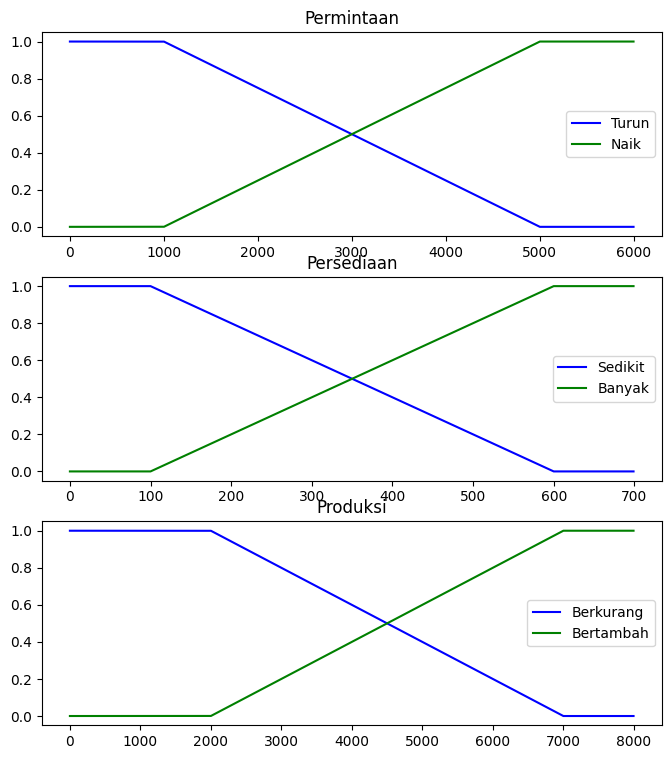

In [9]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))

ax0.plot(permintaan,permintaan_turun,'b', linewidth=1.5,\
         label='Turun')
ax0.plot(permintaan,permintaan_naik, 'g', linewidth=1.5,\
         label='Naik')
ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(persediaan,persediaan_sedikit,'b', linewidth=1.5,\
         label='Sedikit')
ax1.plot(persediaan,persediaan_banyak, 'g', linewidth=1.5,\
         label='Banyak')
ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(produksi,produksi_berkurang,'b', linewidth=1.5,\
         label='Berkurang')
ax2.plot(produksi,produksi_bertambah, 'g', linewidth=1.5,\
         label='Bertambah')
ax2.set_title('Produksi')
ax2.legend()

In [10]:
# Menginputkan Nilai Kasus
minta=4000
sedia=300

In [11]:
# Menentukan Derajat Keanggotaan
x=[]
x.append(fuzz.interp_membership(permintaan,\
        permintaan_turun, minta))
x.append(fuzz.interp_membership(permintaan,\
        permintaan_naik, minta))
y=[]
y.append(fuzz.interp_membership(persediaan,\
        persediaan_sedikit, sedia))
y.append(fuzz.interp_membership(persediaan,\
        persediaan_banyak, sedia))

In [12]:
print("Derajat Keanggotaan Permintaan")
if x[0]>0:
  print("Turun : "+str(x[0]))
if x[1]>0:
  print("Naik : "+str(x[1]))

print("Derajat Keanggotaan Persediaan")
if y[0]>0:
  print("Sedikit : "+str(y[0]))
if y[1]>0:
  print("Banyak : "+str(y[1]))

Derajat Keanggotaan Permintaan
Turun : 0.25
Naik : 0.75
Derajat Keanggotaan Persediaan
Sedikit : 0.6
Banyak : 0.4


In [13]:
# Menentukan Rule Base dan Inferensi Tsukamoto
a1=np.fmin(x[0],y[1])
print("Nilai 1=",x[0]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 1=",a1)
z1=7000-(a1*5000)
print("Nilai z1=",z1)

a2=np.fmin(x[0],y[0])
print("Nilai 1=",x[0]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 2=",a2)
z2=7000-(a2*5000)
print("Nilai z2=",z2)

a3=np.fmin(x[1],y[1])
print("Nilai 1=",x[1]," dan Nilai 2=",y[1])
print("Nilai Alpa Predikat 3=",a3)
z3=(a3*5000)+2000
print("Nilai z3=",z3)

a4=np.fmin(x[1],y[0])
print("Nilai 1=",x[1]," dan Nilai 2=",y[0])
print("Nilai Alpa Predikat 4=",a4)
z4=(a4*5000)+2000
print("Nilai z4=",z4)

Nilai 1= 0.25  dan Nilai 2= 0.4
Nilai Alpa Predikat 1= 0.25
Nilai z1= 5750.0
Nilai 1= 0.25  dan Nilai 2= 0.6
Nilai Alpa Predikat 2= 0.25
Nilai z2= 5750.0
Nilai 1= 0.75  dan Nilai 2= 0.4
Nilai Alpa Predikat 3= 0.4
Nilai z3= 4000.0
Nilai 1= 0.75  dan Nilai 2= 0.6
Nilai Alpa Predikat 4= 0.6
Nilai z4= 5000.0


In [14]:
# Defuzzifikasi
z=(a1*z1+a2*z2+a3*z3+a4*z4)/(a1+a2+a3+a4)
print("Jumlah Produksi PT ABC (Tsukamoto) = ", z)

Jumlah Produksi PT ABC (Tsukamoto) =  4983.333333333333


In [15]:
# Metode Mamdani
from skfuzzy import control as ctrl

In [16]:
# Definisikan Semesta
suhu_udara=ctrl.Antecedent(np.arange(0,50,1),'Suhu Udara')
kelembapan_tanah=ctrl.Antecedent(np.arange(0,70,1),\
                          'Kelembapan Tanah')
durasi_penyiraman=ctrl.Consequent(np.arange(0,90,1),\
                          'Durasi Penyiraman')

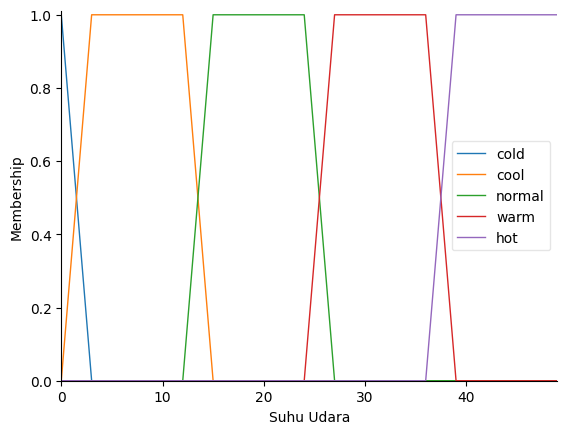

In [17]:
# Membership Function
# Suhu
suhu_udara['cold']=fuzz.trapmf(suhu_udara.universe,\
                               [-10,-10,0,3])
suhu_udara['cool']=fuzz.trapmf(suhu_udara.universe,\
                               [0,3,12,15])
suhu_udara['normal']=fuzz.trapmf(suhu_udara.universe,\
                               [12,15,24,27])
suhu_udara['warm']=fuzz.trapmf(suhu_udara.universe,\
                               [24,27,36,39])
suhu_udara['hot']=fuzz.trapmf(suhu_udara.universe,\
                               [36,39,50,50])
suhu_udara.view()

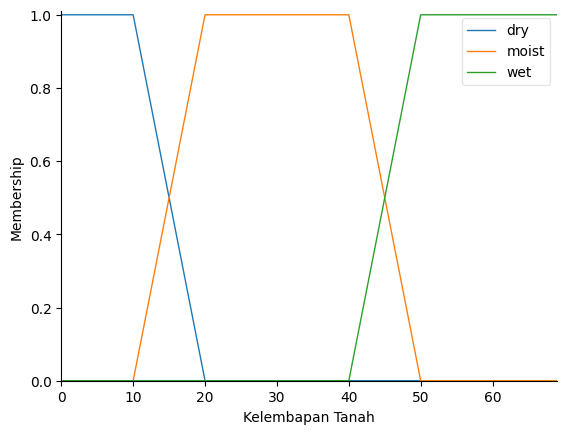

In [18]:
# Kelembapan
kelembapan_tanah['dry']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [0,0,10,20])
kelembapan_tanah['moist']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [10,20,40,50])
kelembapan_tanah['wet']=fuzz.trapmf(kelembapan_tanah.universe,\
                          [40,50,70,70])
kelembapan_tanah.view()

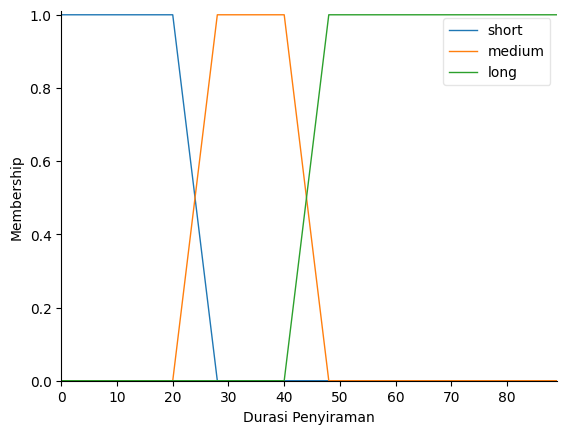

In [19]:
# Durasi
durasi_penyiraman['short']=fuzz.trapmf(\
          durasi_penyiraman.universe,[0,0,20,28])
durasi_penyiraman['medium']=fuzz.trapmf(\
          durasi_penyiraman.universe,[20,28,40,48])
durasi_penyiraman['long']=fuzz.trapmf(\
          durasi_penyiraman.universe,[40,48,90,90])
durasi_penyiraman.view()

In [20]:
# Rule yang digunakan
rule1=ctrl.Rule(suhu_udara['warm'] & kelembapan_tanah['dry'],\
                durasi_penyiraman['long'])
rule2=ctrl.Rule(suhu_udara['warm'] & kelembapan_tanah['moist'],\
                durasi_penyiraman['medium'])
rule3=ctrl.Rule(suhu_udara['hot'] & kelembapan_tanah['dry'],\
                durasi_penyiraman['long'])
rule4=ctrl.Rule(suhu_udara['hot'] & kelembapan_tanah['moist'],\
                durasi_penyiraman['medium'])

In [21]:
# Masukkan Rule ke system Fuzzy
penyiraman_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [23]:
# Persiapan Simulasi Fuzzy Mamdani
simulasi_durasi_penyiraman=ctrl.ControlSystemSimulation(\
                            penyiraman_ctrl)

In [24]:
# Inputan Fuzzi Mamdani
simulasi_durasi_penyiraman.input['Suhu Udara']=37
simulasi_durasi_penyiraman.input['Kelembapan Tanah']=12
simulasi_durasi_penyiraman.compute()

Durasi yang Diperlukan Adalah  61.78541886626943  Menit


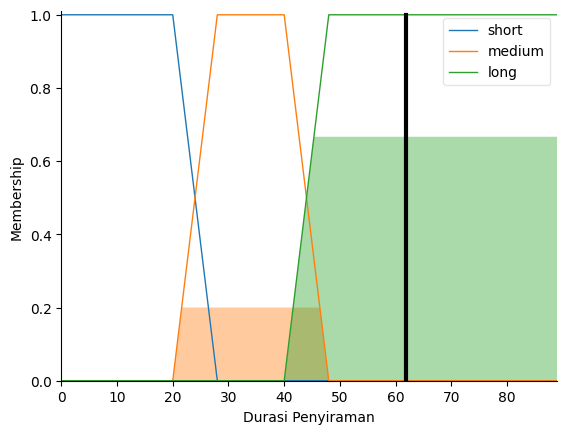

In [25]:
print("Durasi yang Diperlukan Adalah ",\
      simulasi_durasi_penyiraman.output['Durasi Penyiraman'],\
      " Menit")
durasi_penyiraman.view(sim=simulasi_durasi_penyiraman)